# NP Sweep

TJ Kim
6/14/21

Sweep the values of dist_n and dist_p and observe the impact on perceived queue vs distance latency.

Changelog from prior:
- added dist_p to scale the power of offload divide
- added double option to offloading so all values do not have to be integers
- loads per ts are decided as users are generated, not as timesteps pass (simulation consistency)


In [1]:
cd /home/tkim/CMU/DistMEC

/home/tkim/CMU/DistMEC


### Import Relevant Libraries and Dependencies

In [2]:
import numpy as np
import math
import copy
import itertools

from classes.Application import *
from classes.User import *
from classes.Server import *
from solver.Sim_Params import *
from classes.Central_Controller import *
from classes.Container import *
from solver.run_sim_temp import *

### Set Sweep parameters then perform sweep

In [3]:
n_sweep = [0.01, 0.1, 1, 10]
p_sweep = [0, 1, 2, 3, 4]
num_trial = 5

In [9]:
# Cost recording
costs_l = {}
costs_q = {}

for t in range(num_trial):
    print('trial',t)

    sim_param = Sim_Params(big_ts=5, small_ts=5, x_length=5, y_length=5, num_users=20, num_servers=10, num_apps=5)
    servers, users, containers, apps = setup_sim(sim_param)

    for (n,p) in itertools.product(n_sweep,p_sweep):
        print('n,p:', n,p)
        # Override important values
        sim_param.dist_n = n
        sim_param.dist_p = p

        apps_temp = copy.deepcopy(apps)
        for a in apps_temp:
            a.dist_n = n
            a.dist_p = p
            a.offload_mode = 'd'
        apps_temp = run_sim_temp(sim_param, servers, users, containers, apps_temp)
    
        costs_l[(n,p,t)] = 0
        costs_q[(n,p,t)] = 0
        
        for u in range(len(apps_temp)):
            for key in apps_temp[u].queue_length.keys():
                costs_q[(n,p,t)] += np.sum(apps_temp[u].queue_length[key][:,3] * apps_temp[u].queue_length[key][:,2])
                costs_l[(n,p,t)] += np.sum(apps_temp[u].queue_length[key][:,4] * apps_temp[u].queue_length[key][:,2])

trial 0
n,p: 0.01 0
n,p: 0.01 1
n,p: 0.01 2
n,p: 0.01 3
n,p: 0.01 4
n,p: 0.1 0
n,p: 0.1 1
n,p: 0.1 2
n,p: 0.1 3
n,p: 0.1 4
n,p: 1 0
n,p: 1 1
n,p: 1 2
n,p: 1 3
n,p: 1 4
n,p: 10 0
n,p: 10 1
n,p: 10 2
n,p: 10 3
n,p: 10 4
trial 1
n,p: 0.01 0
n,p: 0.01 1
n,p: 0.01 2
n,p: 0.01 3
n,p: 0.01 4
n,p: 0.1 0
n,p: 0.1 1
n,p: 0.1 2
n,p: 0.1 3
n,p: 0.1 4
n,p: 1 0
n,p: 1 1
n,p: 1 2
n,p: 1 3
n,p: 1 4
n,p: 10 0
n,p: 10 1
n,p: 10 2
n,p: 10 3
n,p: 10 4
trial 2
n,p: 0.01 0
n,p: 0.01 1
n,p: 0.01 2
n,p: 0.01 3
n,p: 0.01 4
n,p: 0.1 0
n,p: 0.1 1
n,p: 0.1 2
n,p: 0.1 3
n,p: 0.1 4
n,p: 1 0
n,p: 1 1
n,p: 1 2
n,p: 1 3
n,p: 1 4
n,p: 10 0
n,p: 10 1
n,p: 10 2
n,p: 10 3
n,p: 10 4
trial 3
n,p: 0.01 0
n,p: 0.01 1
n,p: 0.01 2
n,p: 0.01 3
n,p: 0.01 4
n,p: 0.1 0
n,p: 0.1 1
n,p: 0.1 2
n,p: 0.1 3
n,p: 0.1 4
n,p: 1 0
n,p: 1 1
n,p: 1 2
n,p: 1 3
n,p: 1 4
n,p: 10 0
n,p: 10 1
n,p: 10 2
n,p: 10 3
n,p: 10 4
trial 4
n,p: 0.01 0
n,p: 0.01 1
n,p: 0.01 2
n,p: 0.01 3
n,p: 0.01 4
n,p: 0.1 0
n,p: 0.1 1
n,p: 0.1 2
n,p: 0.1 3
n,p: 0.1 4
n,p: 

# Plot results

Normalize outputs across trials and plot results for each pair.

fix p and sweep d.

In [11]:
# Analyse data and normalize - mean and SD of queue and length
l_collect = []
q_collect = []

for t in range(num_trial):
    for n,p in itertools.product(n_sweep,p_sweep):
        l_collect += [costs_l[(n,p,t)]]
        q_collect += [costs_q[(n,p,t)]]

l_collect = np.asarray(l_collect)
q_collect = np.asarray(q_collect)

l_mean = np.mean(l_collect)
l_std = np.std(l_collect)
q_mean = np.mean(q_collect)
q_std = np.std(q_collect)

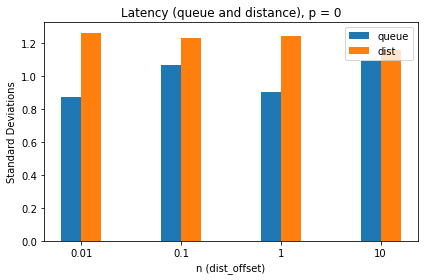

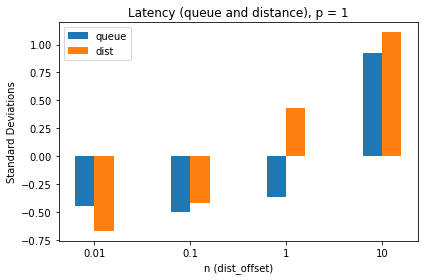

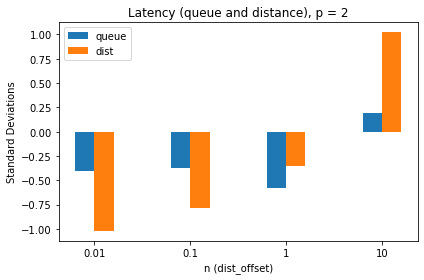

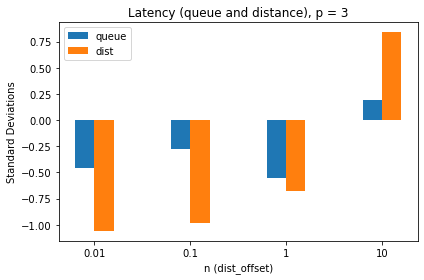

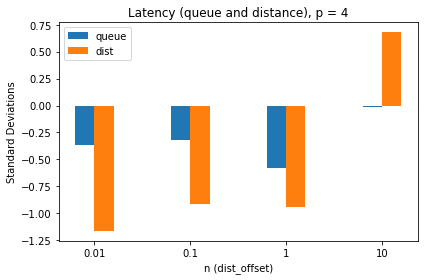

In [12]:
import matplotlib.pyplot as plt

for p in p_sweep:
    
    n_vals_to_plot_q = []
    n_vals_to_plot_l = []
    
    
    for n in n_sweep:
        n_val_cumul_q = 0
        n_val_cumul_l = 0
        for t in range(num_trial):
            n_val_cumul_q += costs_q[(n,p,t)]/num_trial
            n_val_cumul_l += costs_l[(n,p,t)]/num_trial
            
        n_vals_to_plot_q += [(n_val_cumul_q-q_mean)/q_std]
        n_vals_to_plot_l += [(n_val_cumul_l-l_mean)/l_std]
    
    # Plot the value
    labels = ['0.01','0.1','1','10']
    q_vals = n_vals_to_plot_q
    l_vals = n_vals_to_plot_l
    width = 0.2  # the width of the bars
    
    fig, ax = plt.subplots()
    x = np.arange(len(labels))
    rects1 = ax.bar(x - width/2, q_vals, width, label='queue')
    rects2 = ax.bar(x + width/2, l_vals, width, label='dist')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Standard Deviations')
    ax.set_xlabel('n (dist_offset)')
    ax.set_title('Latency (queue and distance), p = '+ str(p))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [13]:
# Print stats
print("l_mean:", round(l_mean,0), "l_std:", round(l_std,0))
print("q_mean:", round(q_mean,0), "q_std:", round(q_std,0))

l_mean: 5740.0 l_std: 2113.0
q_mean: 7285.0 q_std: 4364.0
